## Konsep dasar pembiasan cahaya
Konsep dasar didasari oleh hasil pemikiran ilmuwan
Belanda Willebrord Snellius yang lebih
dikenal dengan hukum I Snellius dan hukum II
Snellius.
## Hukum I Snellius berbunyi : 
sinar datang, sinar bias, dan garis normal terletak pada satu bidang datar.
## Hukum II Snellius berbunyi : 
jika sinar datang dari medium kurang rapat ke medium lebih rapat (misalnya dari udara ke air), maka sinar dibelokkan mendekati garis normal. Dan sebaliknya, sinar datang dari medium lebih rapat ke medium kurang rapat (misalnya dari air ke udara), maka sinar dibelokkan menjauhi
garis normal.

## Perumusan Hukum Snellius
$$
\frac{\sin \theta_1}{\sin \theta_2} = \frac{v_1}{v_2} = \frac{n_2}{n_1}
$$

atau 

$$
n_1 \sin \theta_1 = n_2 \sin \theta_2
$$

atau 

$$
v_1 \sin \theta_2 = v_2 \sin \theta_1
$$



In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import Tk, Label, Entry, Button, Frame

In [102]:
def plot_refraction():
    # MEMBUAT TAMPILAN AWAL KOSONG
    for widget in plot_frame.winfo_children():
        widget.destroy()

    # INPUT PARAMETER
    n1 = float(entry_n1.get())
    n2 = float(entry_n2.get())
    theta1_deg = float(entry_theta1.get())

    # Konversi sudut ke radian
    theta1_rad = np.radians(theta1_deg)

    # Hitung sudut pembiasan (Belum untuk simulasi sudut kritis)
    try:
        theta2_rad = np.arcsin((n1 / n2) * np.sin(theta1_rad))
        theta2_deg = np.degrees(theta2_rad)
    except ValueError:
        theta2_deg = None  # ANTISIPASI SUDUT KRITIS
        
    # Panjang sinar untuk visualisasi
    length = 1.5

    # Koordinat sinar datang
    x_in = [0, -length * np.sin(theta1_rad)]
    y_in = [0, length * np.cos(theta1_rad)]

    # Setup plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Medium
    ax.fill_between([-2, 2], 0, -2, color='lightblue', alpha=0.3, label='Medium 2 (n2)')
    ax.text(-1.8, -1.8, "Medium 2", fontsize=10, color="blue")
    ax.text(-1.8, 1.5, "Medium 1", fontsize=10, color="black")

    # Garis normal
    ax.plot([0, 0], [-2, 2], 'k--', linewidth=1, label="Normal")

    # Sinar datang
    ax.plot(x_in, y_in, 'r-', linewidth=2, label=f"Sinar Datang (\u03b81 = {theta1_deg}\u00b0)")

    if theta2_deg is not None:
        # Jika tidak terjadi sudut kritis, hitung sinar bias
        x_out_normal = [0, length * np.sin(theta2_rad)]
        y_out_normal = [0, -length * np.cos(theta2_rad)]

        # Sinar bias
        ax.plot(x_out_normal, y_out_normal, 'g-', linewidth=2, label=f"Sinar Bias (\u03b82 = {theta2_deg:.2f}\u00b0)")
    else:
        ax.text(0.5, -1, "SUDUT KRITIS", fontsize=12, color="red")

    #Label Grafik
    ax.scatter([0], [0], color='black', zorder=5)  # MEMBUAT TITIK (0,0)
    ax.set_title("Visualisasi Pembiasan Cahaya (Hukum Snellius)", fontsize=14)
    ax.set_xlabel("Sumbu X", fontsize=14)
    ax.set_ylabel("Sumbu Y", fontsize=14)
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.axis('equal')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    # Memasukkan Grafik di GUI 
    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack(fill='both', expand=True)
    canvas.draw()

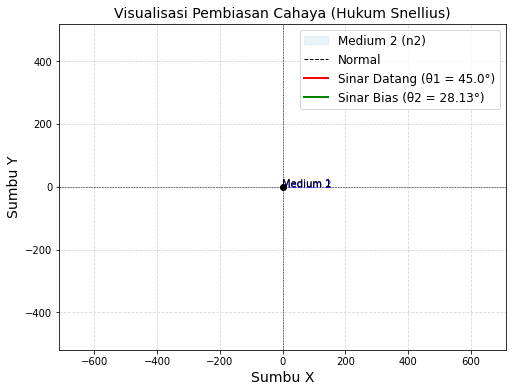

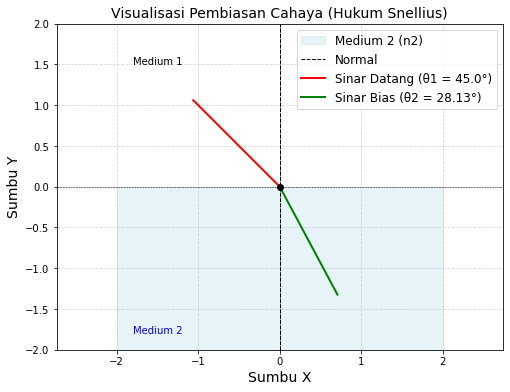

In [103]:
# GUI menggunakan Tkinter
root = Tk()
root.title("Hukum Snellius - Pembiasan Cahaya")

# Frame untuk input
input_frame = Frame(root)
input_frame.pack(side='top', fill='x', padx=10, pady=5)

# Label dan Entry untuk n1
Label(input_frame, text="Indeks Bias n1 (Medium 1):").grid(row=0, column=0, padx=10, pady=5, sticky="e")
entry_n1 = Entry(input_frame)
entry_n1.grid(row=0, column=1, padx=10, pady=5)
entry_n1.insert(0, "1.0")  # Default value

# Label dan Entry untuk n2
Label(input_frame, text="Indeks Bias n2 (Medium 2):").grid(row=1, column=0, padx=10, pady=5, sticky="e")
entry_n2 = Entry(input_frame)
entry_n2.grid(row=1, column=1, padx=10, pady=5)
entry_n2.insert(0, "1.5")  # Default value

# Label dan Entry untuk theta1
Label(input_frame, text="Sudut Datang \u03b81 (derajat):").grid(row=2, column=0, padx=10, pady=5, sticky="e")
entry_theta1 = Entry(input_frame)
entry_theta1.grid(row=2, column=1, padx=10, pady=5)
entry_theta1.insert(0, "45")  # Default value

# Tombol untuk memplot grafik
Button(input_frame, text="Hitung dan Tampilkan Grafik", command=plot_refraction).grid(row=3, column=0, columnspan=2, pady=10)

# Frame untuk grafik
plot_frame = Frame(root)
plot_frame.pack(side='bottom', fill='both', expand=True, padx=10, pady=5)

# Menjalankan GUI
root.mainloop()
